In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension of X (100, 2)
dimension of Y (100, 1)


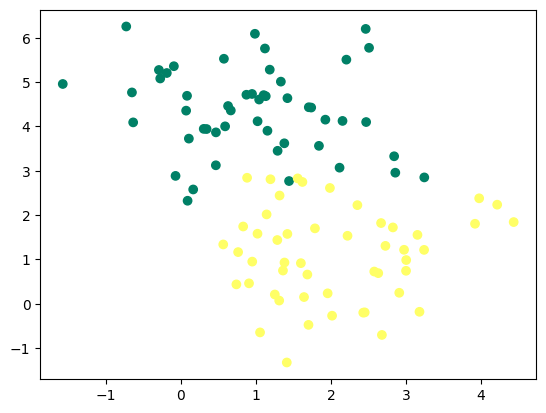

In [305]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print('dimension of X', X.shape)
print('dimension of Y', y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, cmap='summer')
plt.show()


In [306]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [307]:
W, b = initialisation(X)

In [308]:
def model(X, W, b):
    Z = X @ W + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [309]:
A = model(X, W, b)
A.shape

(100, 1)

In [310]:
def log_loss(A, y):
    return -1/len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1-A))

In [311]:
log_loss(A, y)

3.891759861888774

In [312]:
def gradients(A, X, y):
    dWj = 1/len(y) * np.matmul(X.T, A - y) # j stands for Jacobin
    db = 1/len(y) * np.sum(A - y)
    return (dWj, db)


In [313]:
dWj, db = gradients(A, X, y)
print(dWj.shape)
print(db.shape) # real number

(2, 1)
()


In [314]:
def update(dWj, db, W, b, alpha):
    W = W - alpha * dWj
    b = b - alpha * db
    return (W, b)

In [315]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [316]:
def artificial_neuron(X, y, learning_rate = 0.05, n_iter = 400):
    
    # initialisation
    W, b = initialisation(X)
    Loss = []

    # training
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dWj, db = gradients(A,X, y)
        W, b = update(dWj, db, W, b, learning_rate)

    # make some predictions
    y_pred = predict(X, W, b)
    print(accuracy_score(y_pred, y))
    
    plt.figure()
    plt.plot(Loss)
    plt.show

    return (W, b)


0.92
 


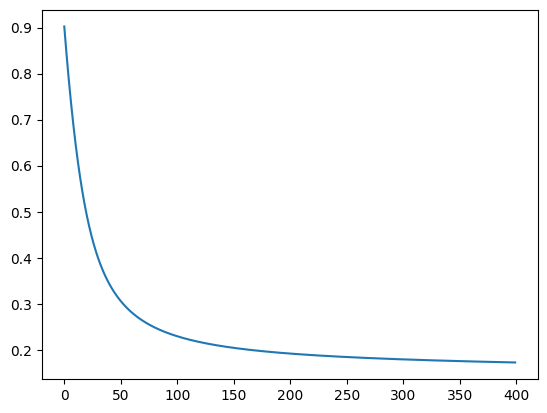

In [317]:
W, b = artificial_neuron(X, y)
print(' ')

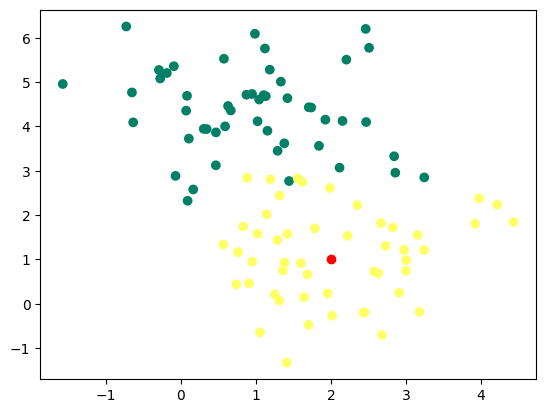

[ True]


In [318]:
plant = np.array([2, 1])

plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, cmap='summer')
plt.scatter(plant[0],plant[1], c = 'r')
plt.show()

print(predict(plant, W, b))